In [2]:
import xarray as xr
import salem
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
ncfile1='./pressure_levels.nc'
ncfile2='./single_level.nc'


In [3]:
slevel = salem.open_xr_dataset(ncfile2)
plevels = salem.open_xr_dataset(ncfile1)
u = plevels.u
v = plevels.v


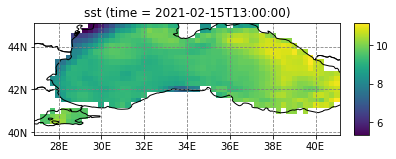

In [4]:
sst=(slevel.sst.isel(time=5)-273.15)
sst.salem.quick_map()

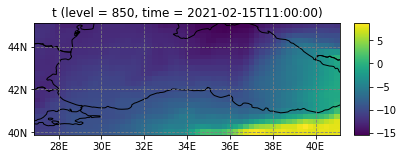

In [5]:
t850 = plevels.t.isel(time=3,level=1)-273.15
t850.salem.quick_map()

In [61]:
lats = plevels.latitude.data
lons = plevels.longitude.data


In [8]:
u850 =plevels.u.isel(time=4,level=1)
v850 =plevels.v.isel(time=4,level=1)
R850 = np.sqrt(u850**2+v850**2)
teta850 = ((np.arccos(u850/R850)*180/np.pi))

u700 =plevels.u.isel(time=4,level=1)
v700 =plevels.v.isel(time=4,level=1)
R700 = np.sqrt(u700**2+v700**2)
teta700 = ((np.arccos(u700/R700)*180/np.pi))

u_surf =slevel.u10.isel(time=4)
v_surf =slevel.v10.isel(time=4)
R_surf = np.sqrt(u_surf**2+v_surf**2)
teta_surf = ((np.arccos(u_surf/R_surf)*180/np.pi))

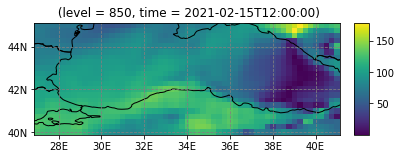

In [9]:
teta850.salem.quick_map()

Text(0.5, 1.0, '850mb Rüzgar Şiddeti ve Yönü')

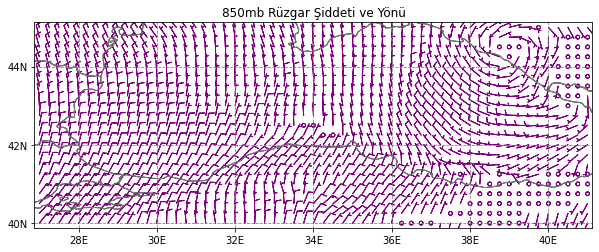

In [66]:
from wrf import to_np
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,10))
smap = plevels.salem.get_map(countries=True)
smap.set_shapefile(countries=True, color='grey')
smap.plot(ax=ax)

xx, yy = smap.grid.transform(lons[:],lats[:],
                                 crs=u.salem.grid.proj)

ax.barbs(xx[:],yy[:],u850[:], v850[:],length=5,barbcolor='purple',rounding=True)
plt.title('850mb Rüzgar Şiddeti ve Yönü')